# Notebook for generating the module `numerical_methods_module`

**Author: Brenton LeMesurier**,
brenton.lemesurier@unco.edu and lemesurierb@cofc.edu

**Last updated on March 31, 2021**
adding versions of Euler's Method and the Classical Runge-Kutta Method for systems.

A collection of functions implementing numerical algorithms from the course and book *Elementary Numerical Analysis*, and a module `numerical_methods_module` produced from that.

## Index

The three main sections (so far) are

- [Zero Finding](#Zero-Finding)
- [Linear Algebra](#Linear-Algebra)
- [Solving Initial Value Problems for Ordinary Differential Equations](#ODE-IVPs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a name="Zero-Finding"></a>
## Zero Finding: solving $f(x) = 0$ or $g(x) = x$

In [2]:
def bisection1(f, a, b, N, demoMode=False):
    '''Approximately solve equation f(x) = 0 in the interval [a, b] with N iterations of the Bisection Method.
    By the way, a triple-quoted multi-line comment like this provides covenient documentation about what a function does,
    so I encourage adding them. Try the commmand `help(bisection1)`
    '''
    c = (a + b)/2
    for iteration in range(N):
        if demoMode: print(f"\nIteration {iteration+1}:")
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c = (a + b)/2
        if demoMode:
            print(f"The root is in interval [{a}, {b}]")
            print(f"The new approximation is {c}, with backward error {np.abs(f(c)):0.3}")
        root = c             
        errorBound = (c-a)
    return (c, errorBound)

In [3]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    def f(x): return x - np.cos(x)
    print("Solving by the Bisection Method.")
    (root, errorBound) = bisection1(f, a=-1, b=1, N=10, demoMode=True)
    print(f"\n{root=}, backward error {np.abs(f(root)):0.3}")

Solving by the Bisection Method.

Iteration 1:
The root is in interval [0.0, 1]
The new approximation is 0.5, with backward error 0.378

Iteration 2:
The root is in interval [0.5, 1]
The new approximation is 0.75, with backward error 0.0183

Iteration 3:
The root is in interval [0.5, 0.75]
The new approximation is 0.625, with backward error 0.186

Iteration 4:
The root is in interval [0.625, 0.75]
The new approximation is 0.6875, with backward error 0.0853

Iteration 5:
The root is in interval [0.6875, 0.75]
The new approximation is 0.71875, with backward error 0.0339

Iteration 6:
The root is in interval [0.71875, 0.75]
The new approximation is 0.734375, with backward error 0.00787

Iteration 7:
The root is in interval [0.734375, 0.75]
The new approximation is 0.7421875, with backward error 0.0052

Iteration 8:
The root is in interval [0.734375, 0.7421875]
The new approximation is 0.73828125, with backward error 0.00135

Iteration 9:
The root is in interval [0.73828125, 0.7421875]
The

In [4]:
def fpi(g, x_0, errorTolerance=1e-6, maxIterations=20, demoMode=False):
    """Fixed point iteration for approximately solving x = f(x),
    x_0: the initial value
    """
    x = x_0
    for iteration in range(maxIterations):
        x_new = g(x)
        errorEstimate = np.abs(x_new - x)
        x = x_new
        if demoMode: print(f"x_{iteration} = {x}, {errorEstimate=:0.3}")
        if errorEstimate <= errorTolerance: break
    return (x, errorEstimate)

In [5]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    def g(x): return np.cos(x)
    print("Fixed point iteration.")
    (root, errorEstimate) = fpi(g, 0, demoMode=True)
    print(f"\n{root=}, {errorEstimate=}")

Fixed point iteration.
x_0 = 1.0, errorEstimate=1.0
x_1 = 0.5403023058681398, errorEstimate=0.46
x_2 = 0.8575532158463934, errorEstimate=0.317
x_3 = 0.6542897904977791, errorEstimate=0.203
x_4 = 0.7934803587425656, errorEstimate=0.139
x_5 = 0.7013687736227565, errorEstimate=0.0921
x_6 = 0.7639596829006542, errorEstimate=0.0626
x_7 = 0.7221024250267079, errorEstimate=0.0419
x_8 = 0.7504177617637604, errorEstimate=0.0283
x_9 = 0.7314040424225099, errorEstimate=0.019
x_10 = 0.7442373549005569, errorEstimate=0.0128
x_11 = 0.7356047404363473, errorEstimate=0.00863
x_12 = 0.7414250866101093, errorEstimate=0.00582
x_13 = 0.7375068905132427, errorEstimate=0.00392
x_14 = 0.7401473355678758, errorEstimate=0.00264
x_15 = 0.7383692041223231, errorEstimate=0.00178
x_16 = 0.7395672022122561, errorEstimate=0.0012
x_17 = 0.7387603198742112, errorEstimate=0.000807
x_18 = 0.739303892396906, errorEstimate=0.000544
x_19 = 0.7389377567153443, errorEstimate=0.000366

root=0.7389377567153443, errorEstimate=0

In [6]:
def newton(f, Df, x0, errorTolerance=1e-15, maxIterations=20, demoMode=False):
    """Basic usage is:
    (rootApproximation, errorEstimate, iterations) = newton(f, Df, x0, errorTolerance)
    There is an optional input parameter "demoMode" which controls whether to
    - print intermediate results (for "study" purposes), or to
    - work silently (for "production" use).
    The default is silence.

    """
    x = x0
    for k in range(1, maxIterations+1):
        fx = f(x)
        Dfx = Df(x)
        # Note: a careful, robust code would check for the possibility of division by zero here,
        # but for now I just want a simple presentation of the basic mathematical idea.
        dx = fx/Dfx
        x -= dx  # Aside: this is shorthand for "x = x - dx"
        errorEstimate = abs(dx)
        if demoMode:
            print(f"At iteration {k} x = {x} with estimated error {errorEstimate:0.3}, backward error {abs(f(x)):0.3}")
        if errorEstimate <= errorTolerance:
            iterations = k
            return (x, errorEstimate, iterations)
    # If we get here, it did not achieve the accuracy target:
    iterations = k
    return (x, errorEstimate, iterations)

In [7]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    def f(x): return x - np.cos(x)
    def Df(x): return 1. + np.sin(x)
    print("Solving by Newton's Method.")
    (root, errorEstimate, iterations) = newton(f, Df, x0=0.,
                                               errorTolerance=1e-8, demoMode=True)
    print()
    print(f"The root is approximately {root}")
    print(f"The estimated absolute error is {errorEstimate}")
    print(f"The backward error is {abs(f(root)):0.3}")
    print(f"This required {iterations} iterations")

Solving by Newton's Method.
At iteration 1 x = 1.0 with estimated error 1.0, backward error 0.46
At iteration 2 x = 0.7503638678402439 with estimated error 0.25, backward error 0.0189
At iteration 3 x = 0.7391128909113617 with estimated error 0.0113, backward error 4.65e-05
At iteration 4 x = 0.7390851333852839 with estimated error 2.78e-05, backward error 2.85e-10
At iteration 5 x = 0.7390851332151606 with estimated error 1.7e-10, backward error 1.11e-16

The root is approximately 0.7390851332151606
The estimated absolute error is 1.7012334067709158e-10
The backward error is 1.11e-16
This required 5 iterations


In [8]:
def false_position(f, a, b, errorTolerance=1e-15, maxIterations=15, demoMode=False):
    """Solve f(x)=0 in the interval [a, b] by the Method of False Position.
    This code also illustrates a few ideas that I encourage, such as:
    - Avoiding infinite loops, by using for loops sand break
    - Avoiding repeated evaluation of the same quantity
    - Use of descriptive variable names
    - Use of "camelCase" to turn descriptive phrases into valid Python variable names
    - An optional "demonstration mode" to display intermediate results.
    """
    fa = f(a)
    fb = f(b)
    for iteration in range(1, maxIterations+1):
        if demoMode: print(f"\nIteration {iteration}:")
        c = (a * fb - fa * b)/(fb - fa)
        fc = f(c)
        if fa * fc < 0:
            b = c
            fb = fc  # N.B. When b is updated, so must be fb = f(b)
        else:
            a = c
            fa = fc
        errorBound = b - a
        if demoMode:
            print(f"The root is in interval [{a}, {b}]")
            print(f"The new approximation is {c}, with error bound {errorBound:0.3}, backward error {abs(fc):0.3}")
        if errorBound < errorTolerance:
            break
    # Whether we got here due to accuracy of running out of iterations,
    # return the information we have, including an error bound:
    root = c  # the newest value is probably the most accurate
    return (root, errorBound)

In [9]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    def f(x): return x - np.cos(x)
    print("Solving by the Method of False Position.")
    (root, errorBound) = false_position(f, a=-1, b=1, demoMode=True)
    print(f"\nThe Method of False Position gave approximate root is {root},")
    print(f"with estimate error {errorBound:0.3}, backward error {abs(f(root)):0.3}")

Solving by the Method of False Position.

Iteration 1:
The root is in interval [0.5403023058681398, 1]
The new approximation is 0.5403023058681398, with error bound 0.46, backward error 0.317

Iteration 2:
The root is in interval [0.7280103614676172, 1]
The new approximation is 0.7280103614676172, with error bound 0.272, backward error 0.0185

Iteration 3:
The root is in interval [0.7385270062423998, 1]
The new approximation is 0.7385270062423998, with error bound 0.261, backward error 0.000934

Iteration 4:
The root is in interval [0.7390571666782676, 1]
The new approximation is 0.7390571666782676, with error bound 0.261, backward error 4.68e-05

Iteration 5:
The root is in interval [0.7390837322783136, 1]
The new approximation is 0.7390837322783136, with error bound 0.261, backward error 2.34e-06

Iteration 6:
The root is in interval [0.7390850630385933, 1]
The new approximation is 0.7390850630385933, with error bound 0.261, backward error 1.17e-07

Iteration 7:
The root is in interv

In [10]:
def secant_method(f, a, b, errorTolerance=1e-15, maxIterations=15, demoMode=False):
    """Solve f(x)=0 in the interval [a, b] by the Secant Method."""
    # Some more descriptive names
    x_older = a
    x_more_recent = b
    f_x_older = f(x_older)
    f_x_more_recent = f(x_more_recent)
    for iteration in range(1, maxIterations+1):
        if demoMode: print(f"\nIteration {iteration}:")
        x_new = (x_older * f_x_more_recent - f_x_older * x_more_recent)/(f_x_more_recent - f_x_older)
        f_x_new = f(x_new)
        (x_older, x_more_recent) = (x_more_recent, x_new)
        (f_x_older, f_x_more_recent) = (f_x_more_recent, f_x_new)
        errorEstimate = abs(x_older - x_more_recent)
        if demoMode:
            print(f"The latest pair of approximations are {x_older} and {x_more_recent},")
            print(f"where the function's values are {f_x_older:0.3} and {f_x_more_recent:0.3} respectively.")
            print(f"The new approximation is {x_new}, with estimated error {errorEstimate:0.3}, backward error {abs(f_x_new):0.3}")
        if errorEstimate < errorTolerance:
            break
    # Whether we got here due to accuracy of running out of iterations,
    # return the information we have, including an error estimate:
    return (x_new, errorEstimate)

In [11]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    def f(x): return x - np.cos(x)
    print(f"Solving by the Secant Method.")        
    (root, errorEstimate) = secant_method(f, a=-1, b=1, demoMode=True)
    print(f"\nThe Secant Method gave approximate root is {root},")
    print(f"with estimated error {errorEstimate:0.3}, backward error {abs(f(root)):0.3}")

Solving by the Secant Method.

Iteration 1:
The latest pair of approximations are 1 and 0.5403023058681398,
where the function's values are 0.46 and -0.317 respectively.
The new approximation is 0.5403023058681398, with estimated error 0.46, backward error 0.317

Iteration 2:
The latest pair of approximations are 0.5403023058681398 and 0.7280103614676172,
where the function's values are -0.317 and -0.0185 respectively.
The new approximation is 0.7280103614676172, with estimated error 0.188, backward error 0.0185

Iteration 3:
The latest pair of approximations are 0.7280103614676172 and 0.7396270126307336,
where the function's values are -0.0185 and 0.000907 respectively.
The new approximation is 0.7396270126307336, with estimated error 0.0116, backward error 0.000907

Iteration 4:
The latest pair of approximations are 0.7396270126307336 and 0.7390838007832722,
where the function's values are 0.000907 and -2.23e-06 respectively.
The new approximation is 0.7390838007832722, with estimate

<a name="Linear-Algebra"></a>
## Linear Algebra

### Basic row reduction elimination and backward substitution

In [12]:
def rowReduce(A, b):
    """To avoid modifying the matrix and vector specified as input,
    they are copyied to new arrays, with the method .copy()
    Warning: it does not work to say "U = A" and "c = b";
    this makes these names synonyms, referring to the same stored data.
    Also: this doe not modify the vlaue of U belwo th main diagonal,
    since they are know to be zero, an wil bever be used;
    to clean this up, use function zeros_below_diagonal.
    """    
    U = A.copy()
    c = b.copy()
    n = len(b)
    # The function zeros_like() is used to create L with the same size and shape as A,
    # and with all its elements zero initially.
    L = np.zeros_like(A)
    for k in range(n-1):
        for i in range(k+1, n):
            L[i,k] = U[i,k] / U[k,k]
            for j in range(k+1, n):
                U[i,j] = U[i,j] - L[i,k] * U[k,j]
            c[i]= c[i] - L[i,k] * c[k]
    return (U, c)

Immediately updated to the following, but I leave the first version for reference.

In [13]:
def rowReduce(A, b):
    """To avoid modifying the matrix and vector specified as input,
    they are copied to new arrays, with the method .copy()
    Warning: it does not work to say "U = A" and "c = b";
    this makes these names synonyms, referring to the same stored data.
    This code leaves "garbage values" below the main diagonal
    if needed, clean up with the function zeros_below_diagonal.
    """    
    U = A.copy()
    c = b.copy()
    n = len(b)
    # The function zeros_like() is used to create L with the same size and shape as A,
    # and with all its elements zero initially.
    L = np.zeros_like(A)
    for k in range(n-1):
        # compute all the L values for column k:
        L[k+1:n,k] = U[k+1:n,k] / U[k,k]  # Beware the case where U[k,k] is 0
        for i in range(k+1, n):
            U[i,k+1:n] -= L[i,k] * U[k,k+1:n]  # Update row i
        c[k+1:n] -= L[k+1:n,k] * c[k]  # update c values
    return (U, c)

Further updated on March 7 as follows, adding `demoMode` and "zeroing" below the main diagonal in U when using that mode.

In [14]:
def rowReduce(A, b, demoMode=False):
    """To avoid modifying the matrix and vector specified as input,
    they are copied to new arrays, with the method .copy()
    Warning: it does not work to say "U = A" and "c = b";
    this makes these names synonyms, referring to the same stored data.
    This code leaves "garbage values" below the main diagonal
    if needed, clean up with the function zeros_below_diagonal.
    
    2021-03-07: added a demonstration mode.
    """    
    U = A.copy()
    c = b.copy()
    n = len(b)
    # The function zeros_like() is used to create L with the same size and shape as A,
    # and with all its elements zero initially.
    L = np.zeros_like(A)
    for k in range(n-1):
        if demoMode: print(f"Step {k=}")
        # compute all the L values for column k:
        L[k+1:,k] = U[k+1:n,k] / U[k,k]  # Beware the case where U[k,k] is 0
        if demoMode:
            print(f"The multipliers in column {k+1} are {L[k+1:,k]}")
        for i in range(k+1, n):
            U[i,k+1:n] -= L[i,k] * U[k,k+1:n]  # Update row i
        c[k+1:n] -= L[k+1:n,k] * c[k]  # update c values
        if demoMode:
            # insert zeros in U:
            U[k+1:, k] = 0.
            print(f"The updated matrix is\n{U}")
            print(f"The updated right-hand side is\n{c}")
    return (U, c)

In [15]:
def zeros_below_diagonal(U):
    """Insert the below-diagonal zero values into U, ignored in function rowReduce.
    These are needed to display U correctly,
    and to demonstrate that the new system of equations Ux=c has the same solution as Ax=b.
    """
    for i in range(1,len(U)):
        for j in range(i):
            U[i,j] = 0.

As with `rowReduce`, this is immediately updated to the following, but I leave the first version for reference.

In [16]:
def zeros_below_diagonal(U):
    """Insert the below-diagonal zero values into U, ignored in the function rowReduce.
    These are needed to display U correctly,
    and to demonstrate that the new system of equations Ux=c$ has the same solution as Ax=b.
    """
    for i in range(1,len(U)):
        U[i,:i] = 0.

In [17]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
#    A = np.array([[4. , 235. , 7.], [3. , 5. , -6.],[1. , -3. , 22.]])
    A = np.array([[1. , -3. , 15.], [5. , 200. , 7.], [4. , 11. , -6.]])
    print(f"A =\n{A}")
#    b = np.array([2. , 3. , 4.])
    b = np.array([4. , 3. , 2.])
    print(f"b = {b}")
    
    (U, c) = rowReduce(A, b, demoMode=True)
    zeros_below_diagonal(U)
    print(f"U =\n{U}")
    print(f"c = {c}")

A =
[[  1.  -3.  15.]
 [  5. 200.   7.]
 [  4.  11.  -6.]]
b = [4. 3. 2.]
Step k=0
The multipliers in column 1 are [5. 4.]
The updated matrix is
[[  1.  -3.  15.]
 [  0. 215. -68.]
 [  0.  23. -66.]]
The updated right-hand side is
[  4. -17. -14.]
Step k=1
The multipliers in column 2 are [0.10697674]
The updated matrix is
[[  1.         -3.         15.       ]
 [  0.        215.        -68.       ]
 [  0.          0.        -58.7255814]]
The updated right-hand side is
[  4.         -17.         -12.18139535]
U =
[[  1.         -3.         15.       ]
 [  0.        215.        -68.       ]
 [  0.          0.        -58.7255814]]
c = [  4.         -17.         -12.18139535]


In [18]:
def backwardSubstitution(U, c):
    """Solve U x = c for b."""
    n = len(c)
    x = np.zeros(n)
    x[-1] = c[-1]/U[-1,-1]
    for i in range(2, n+1):
        x[-i] = (c[-i] - sum(U[-i,1-i:] * x[1-i:])) / U[-i,-i]
    return x

**UPDATE:** this was further updated on March 7 as follows, mainly to add `demoMode`.

In [19]:
def backwardSubstitution(U, c, demoMode=False):
    """Solve U x = c for b.
    
    2021-03-07: aded a demonstration mode.
    """
    n = len(c)
    x = np.zeros(n)
    x[-1] = c[-1]/U[-1,-1]
    if demoMode: print(f"x_{n} = {x[-1]}")
    for i in range(2, n+1):
        x[-i] = (c[-i] - sum(U[-i,1-i:] * x[1-i:])) / U[-i,-i]
        if demoMode: print(f"x_{n-i+1} = {x[-i]}")
    return x

In [20]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    x = backwardSubstitution(U, c, demoMode=True)
    print("")
    print(f"x = {x}")
    r = b - A@x
    print(f"The residual b - Ax = {r},")
    print(f"with maximum norm {max(abs(r)):.3}.")

x_3 = 0.20742911452558213
x_2 = -0.013464280057025185
x_1 = 0.8481704419451925

x = [ 0.84817044 -0.01346428  0.20742911]
The residual b - Ax = [ 0.0000000e+00 -8.8817842e-16 -4.4408921e-16],
with maximum norm 8.88e-16.


### LU factorization ...

In [21]:
def lu(A, demoMode=False):
    """Compute the Doolittle LU factorization of A.
    Sums like $\sum_{s=1}^{k-1} l_{k,s} u_{s,j}$ are done as matrix products;
    in the above case, row matrix L[k, 1:k-1] by column matrix U[1:k-1,j] gives the sum for a give j,
    and row matrix L[k, 1:k-1] by matrix U[1:k-1,k:n] gives the relevant row vector.
    """
    n = len(A)  # len() gives the number of rows in a 2D array.
    # Initialize U as the zero matrix;
    # correct below the main diagonal, with the other entries to be computed below.
    U = np.zeros_like(A)
    # Initialize L as the identity matrix;
    # correct on and above the main diagonal, with the other entries to be computed below.
    L = np.identity(n)
   # Column and row 1 (i.e Python index 0) are special:
    U[0,:] = A[0,:]
    L[1:,0] = A[1:,0]/U[0,0]
    if demoMode:
        print(f"After step k=0")
        print(f"U=\n{U}")
        print(f"L=\n{L}")
    for k in range(1, n-1):
        U[k,k:] = A[k,k:] - L[k,:k] @ U[:k,k:]
        L[k+1:,k] = (A[k+1:,k] - L[k+1:,:k] @ U[:k,k])/U[k,k]
        if demoMode:
            print(f"After step {k=}")
            print(f"U=\n{U}")
            print(f"L=\n{L}")
    # The last row (index "-1") is special: nothing to do for L
    U[-1,-1] = A[-1,-1] - sum(L[-1,:-1]*U[:-1,-1])
    if demoMode:
        print(f"After the final step, k={n-1}")
        print(f"U=\n{U}")
    return (L, U)

In [22]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
#    A = np.array([[4. , 235. , 7.], [3. , 5. , -6.],[1. , -3. , 22.]])
    A = np.array([[1. , -3. , 15.], [5. , 200. , 7.], [4. , 11. , -6.]])
    print(f"A =\n{A}")
#    b = np.array([2. , 3. , 4.])
    b = np.array([4. , 3. , 2.])
    print(f"b = {b}")

    (L, U) = lu(A, demoMode=True)

    print(f"A=\n{A}")
    print(f"L=\n{L}")
    print(f"U=\n{U}")
    print(f"L times U is \n{L@U}")
    print(f"The 'residual' A - LU is \n{A - L@U}")

A =
[[  1.  -3.  15.]
 [  5. 200.   7.]
 [  4.  11.  -6.]]
b = [4. 3. 2.]
After step k=0
U=
[[ 1. -3. 15.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
L=
[[1. 0. 0.]
 [5. 1. 0.]
 [4. 0. 1.]]
After step k=1
U=
[[  1.  -3.  15.]
 [  0. 215. -68.]
 [  0.   0.   0.]]
L=
[[1.         0.         0.        ]
 [5.         1.         0.        ]
 [4.         0.10697674 1.        ]]
After the final step, k=2
U=
[[  1.         -3.         15.       ]
 [  0.        215.        -68.       ]
 [  0.          0.        -58.7255814]]
A=
[[  1.  -3.  15.]
 [  5. 200.   7.]
 [  4.  11.  -6.]]
L=
[[1.         0.         0.        ]
 [5.         1.         0.        ]
 [4.         0.10697674 1.        ]]
U=
[[  1.         -3.         15.       ]
 [  0.        215.        -68.       ]
 [  0.          0.        -58.7255814]]
L times U is 
[[  1.  -3.  15.]
 [  5. 200.   7.]
 [  4.  11.  -6.]]
The 'residual' A - LU is 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### ... and forward substitution ...

In [23]:
def forwardSubstitution(L, b):
    """Solve L c = b for c."""
    n = len(b)
    c = np.zeros_like(b)
    c[0] = b[0]
    for i in range(1, n):
        c[i] = b[i] - L[i,:i] @ c[:i]
        # Note: the above uses a row-by-column matrix multiplication to do the same as
        #c[i] = b[i] - sum(L[i,:i] * c[:i])
    return c

In [24]:
def forwardSubstitution(L, b, demoMode=False):
    """Solve L c = b for c.
        
    2021-03-07: aded a demonstration mode.
    """
    n = len(b)
    c = np.zeros(n)
    c[0] = b[0]
    if demoMode: print(f"c_1 = {c[0]}")
    for i in range(1, n):
        c[i] = b[i] - L[i,:i] @ c[:i]
        # Note: the above uses a row-by-column matrix multiplication to do the same as
        #c[i] = b[i] - sum(L[i,:i] * c[:i])
        if demoMode: print(f"c_{i+1} = {c[i]}")
    return c

In [25]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    c = forwardSubstitution(L, b, demoMode=True)
    print("")
    print(f"c = {c}")

c_1 = 4.0
c_2 = -17.0
c_3 = -12.18139534883721

c = [  4.         -17.         -12.18139535]


### ... and finally backward substitution again, to complete the LU factorization method example

In [26]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
    x = backwardSubstitution(U, c, demoMode=True)
    print("")
    print(f"The residual c - Ux for the backward substitution step is {c - U@x}")
    print(f"\t with maximum norm {np.max(np.abs(c - U@x)):0.3}")
    print(f"The residual b - Ax for the whole solving process is {b - A@x}")
    print(f"\t with maximum norm {np.max(np.abs(b - A@x)):0.3}")

x_3 = 0.20742911452558213
x_2 = -0.013464280057025185
x_1 = 0.8481704419451925

The residual c - Ux for the backward substitution step is [0. 0. 0.]
	 with maximum norm 0.0
The residual b - Ax for the whole solving process is [ 0.0000000e+00 -8.8817842e-16 -4.4408921e-16]
	 with maximum norm 8.88e-16


In [27]:
def rowReduceMaximalElementPivoting(A, b, demoMode=False):
    """Solve Ax=b by maximl element partial pivoting.
    This version actually swaps rows rather than keeping track of pivot row indices.
    """    
    U = A.copy()
    c = b.copy()
    n = len(b)
    # The function zeros_like() is used to create L with the same size and shape as A,
    # and with all its elements zero initially.
    L = np.zeros_like(A)
    for k in range(n-1):
        if demoMode: print(f"Step {k=}")
        # Swap rows if necessary
        pivot_row = k
        size_U_pivot_row_k = abs(U[k,k])
        for i in range(k+1,n):
            size_U_i_k = abs(U[i,k])
            if size_U_i_k > size_U_pivot_row_k:
                pivot_row = i
                size_U_pivot_row_k = size_U_i_k
        # swap rows?
        if pivot_row > k:
            if demoMode:
                print(f"swap row {k} with row {pivot_row}")
            row_temp = U[pivot_row].copy()
            U[pivot_row] = U[k].copy()
            U[k] = row_temp.copy()
            #( U[k,:], U[pivot_row,:] ) = ( U[pivot_row,:], U[k,:] )
            ( c[k], c[pivot_row] ) = ( c[pivot_row], c[k] )
            if demoMode:
                print(f"After this row swap, the matrix is\n{U}")
                print(f"and the right-hand side is\n{c}")
        # compute all the L values for column k:
        L[k+1:,k] = U[k+1:n,k] / U[k,k]
        if demoMode:
            print(f"The multipliers in column {k+1} are {L[k+1:,k]}")
        for i in range(k+1, n):
            U[i,k+1:n] -= L[i,k] * U[k,k+1:n]  # Update row i
        c[k+1:n] -= L[k+1:n,k] * c[k]  # update c values
        if demoMode:
            # insert zeros in U:
            U[k+1:, k] = 0.
            print(f"The updated matrix is\n{U}")
            print(f"The updated right-hand side is\n{c}")
    return (U, c)

In [28]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it
#    A = np.array([[4. , 235. , 7.], [3. , 5. , -6.],[1. , -3. , 22.]])
    A = np.array([[1. , -3. , 15.], [5. , 200. , 7.], [4. , 11. , -6.]])
    print(f"A =\n{A}")
#    b = np.array([2. , 3. , 4.])
    b = np.array([4. , 3. , 2.])
    print(f"b = {b}")

    (U, c) = rowReduceMaximalElementPivoting(A, b, demoMode=True)
    zeros_below_diagonal(U)
    print(f"U =\n{U}")
    print(f"c = {c}")

A =
[[  1.  -3.  15.]
 [  5. 200.   7.]
 [  4.  11.  -6.]]
b = [4. 3. 2.]
Step k=0
swap row 0 with row 1
After this row swap, the matrix is
[[  5. 200.   7.]
 [  1.  -3.  15.]
 [  4.  11.  -6.]]
and the right-hand side is
[3. 4. 2.]
The multipliers in column 1 are [0.2 0.8]
The updated matrix is
[[   5.   200.     7. ]
 [   0.   -43.    13.6]
 [   0.  -149.   -11.6]]
The updated right-hand side is
[ 3.   3.4 -0.4]
Step k=1
swap row 1 with row 2
After this row swap, the matrix is
[[   5.   200.     7. ]
 [   0.  -149.   -11.6]
 [   0.   -43.    13.6]]
and the right-hand side is
[ 3.  -0.4  3.4]
The multipliers in column 2 are [0.2885906]
The updated matrix is
[[   5.          200.            7.        ]
 [   0.         -149.          -11.6       ]
 [   0.            0.           16.94765101]]
The updated right-hand side is
[ 3.         -0.4         3.51543624]
U =
[[   5.          200.            7.        ]
 [   0.         -149.          -11.6       ]
 [   0.            0.           16

<a name="ODE-IVPs"></a>
## Solving Initial Value Problems for Ordinary Differential Equations

### Basic implementations of some basic methods

(More to come.)

In [29]:
def euler(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following two lines will need to change for the systems version
    U = np.empty_like(t)
    U[0] = u_0
    
    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

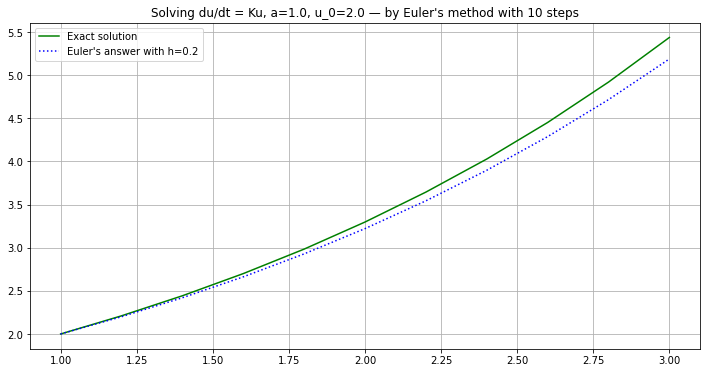

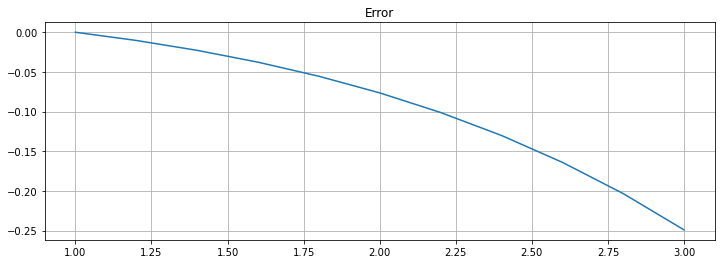

In [30]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_1(t, u):
        """The simplest "genuine" ODE, (not just integration)
        The solution is u(t) = u(t; a, u_0) = u_0 exp(t-a)
        """
        return K*u
    def u_1(t): return u_0 * np.exp(K*(t-a))
 
    a = 1.
    b = 3.
    u_0 = 2.
    K = 0.5
    n = 10

    (t, U) = euler(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=} — by Euler's method with {n} steps")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

In [31]:
def euler_system(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0
    Modified from function euler to handle systems."""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    
    # Only the following three lines change for the systems version
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

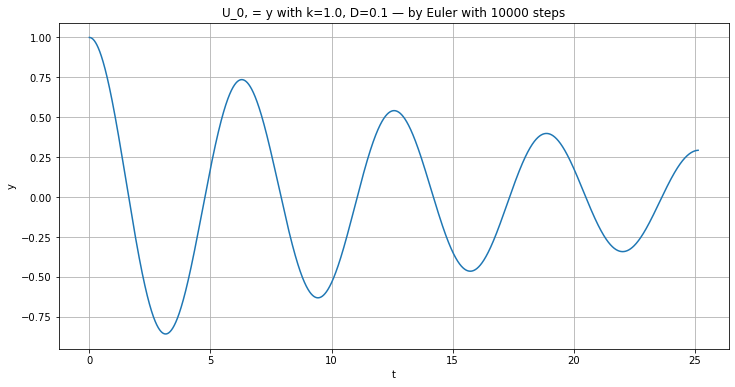

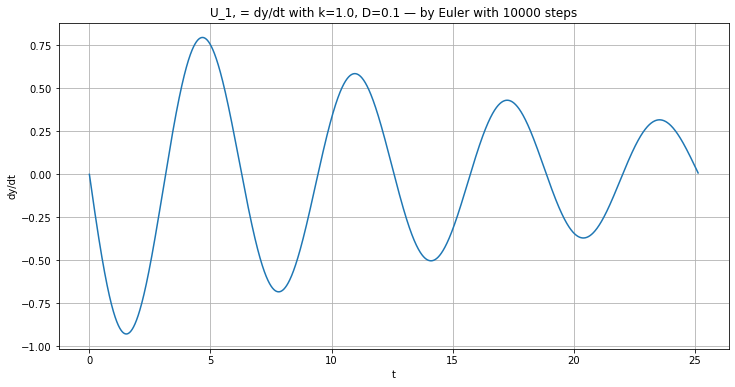

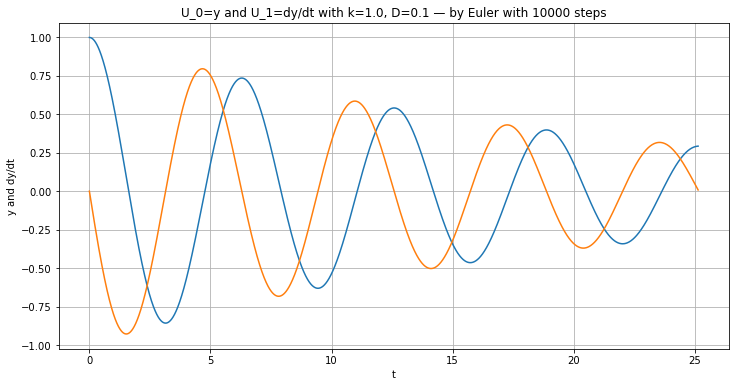

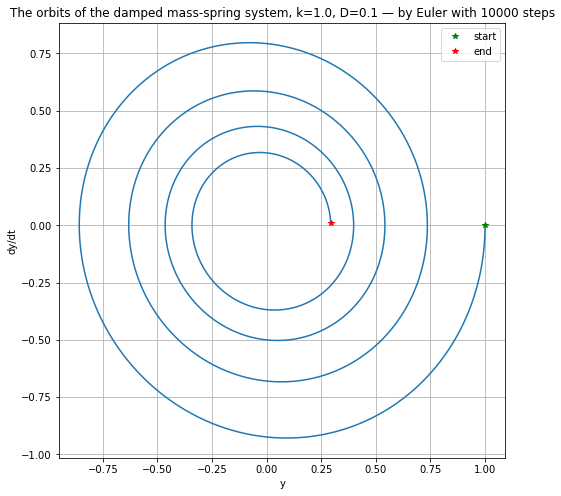

In [32]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f(t, u):
        return np.array([ u[1], -(k/M)*u[0] - (D/M)*u[1]])

    M = 1.0
    k = 1.0
    D = 0.1
    u_0 = [1.0, 0.0]
    a = 0.0
    b = 8 * np.pi # Four periods

    n=10000
    (t, U) = euler_system(f, a, b, u_0, n)
    y = U[:,0]
    Dy = U[:,1]

    plt.figure(figsize=[12,6])
    plt.title(f"U_0, = y with {k=}, {D=} — by Euler with {n} steps")
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)

    plt.figure(figsize=[12,6])
    plt.title(f"U_1, = dy/dt with {k=}, {D=} — by Euler with {n} steps")
    plt.plot(t, Dy)
    plt.xlabel('t')
    plt.ylabel('dy/dt')
    plt.grid(True)

    plt.figure(figsize=[12,6])
    plt.title(f"U_0=y and U_1=dy/dt with {k=}, {D=} — by Euler with {n} steps")
    plt.plot(t, U)
    plt.xlabel('t')
    plt.ylabel('y and dy/dt')
    plt.grid(True)

    plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
    if D == 0.:
        plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Euler with {n} steps")
    else:
        plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Euler with {n} steps")
    plt.plot(y, Dy)
    plt.xlabel('y')
    plt.ylabel('dy/dt')
    plt.plot(y[0], Dy[0], "g*", label="start")
    plt.plot(y[-1], Dy[-1], "r*", label="end")
    plt.legend()
    plt.grid(True)

In [33]:
def explicitTrapezoid(f, a, b, u_0, n=100):
    """Use the Explict Trapezoid Method (a.k.a Improved Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following two lines will need to change for the systems version
    U = np.empty_like(t)
    U[0] = u_0

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h, U[i]+K_1)*h
        U[i+1] = U[i] + (K_1 + K_2)/2.
    return (t, U)

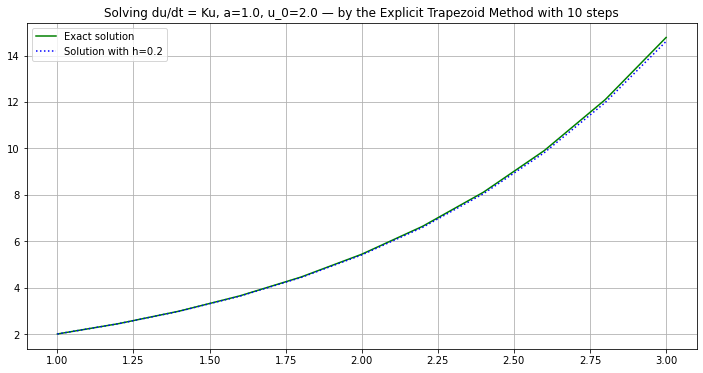

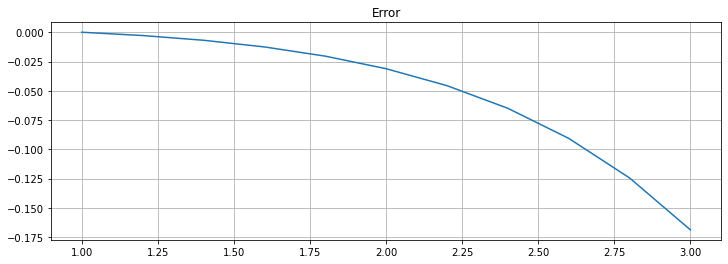

In [34]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
  
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = explicitTrapezoid(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=} — by the Explicit Trapezoid Method with {n} steps")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

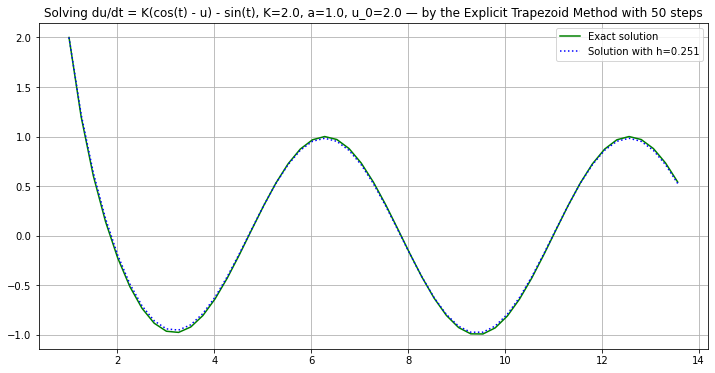

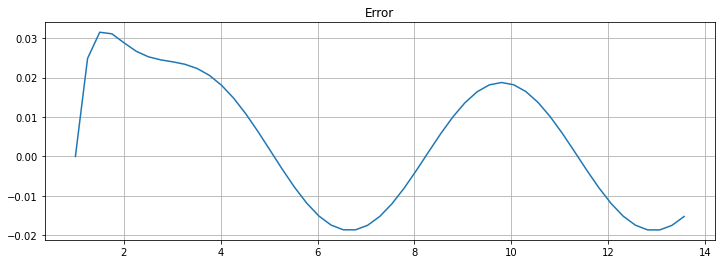

In [35]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitTrapezoid(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} — by the Explicit Trapezoid Method with {n} steps")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

In [36]:
def explicitMidpoint(f, a, b, u_0, n=100):
    """Use the Explicit Midpoint Method (a.k.a Modified Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following two lines will need to change for the systems version
    U = np.empty_like(t)
    U[0] = u_0

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        U[i+1] = U[i] + K_2
    return (t, U)

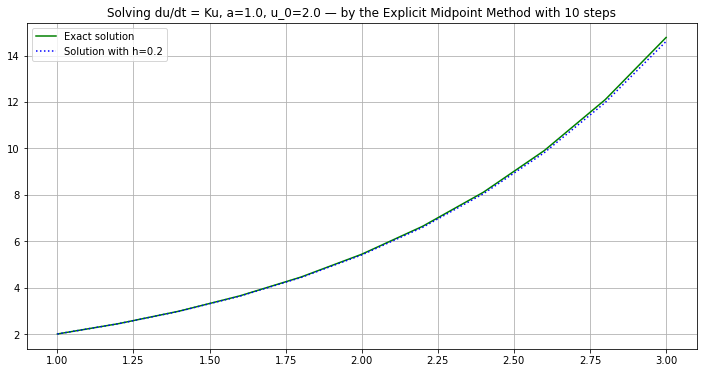

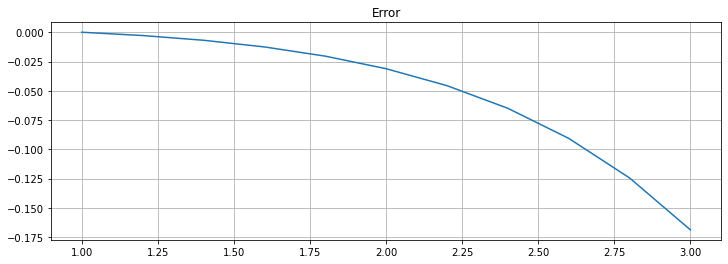

In [37]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
  
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = explicitMidpoint(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=} — by the Explicit Midpoint Method with {n} steps")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

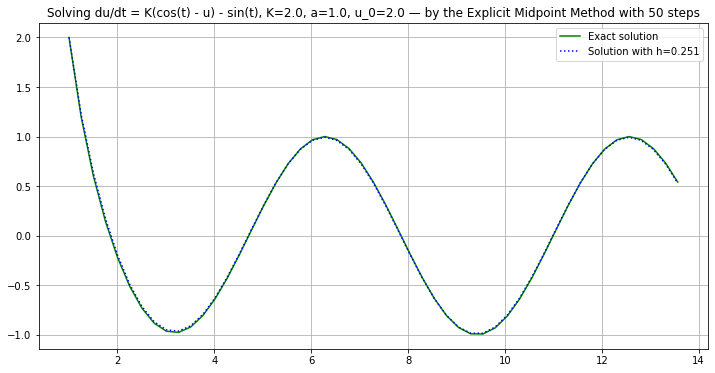

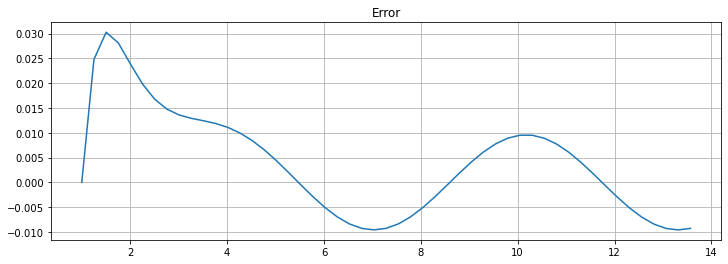

In [38]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitMidpoint(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} — by the Explicit Midpoint Method with {n} steps")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

In [39]:
def RungeKutta(f, a, b, u_0, n=100):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following two lines will need to change for the systems version
    U = np.empty_like(t)
    U[0] = u_0

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, U[i]+K_2/2)*h
        K_4 = f(t[i]+h, U[i]+K_3)*h
        U[i+1] = U[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, U)

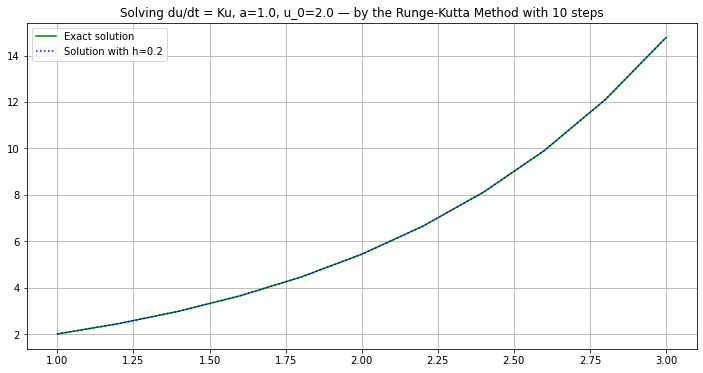

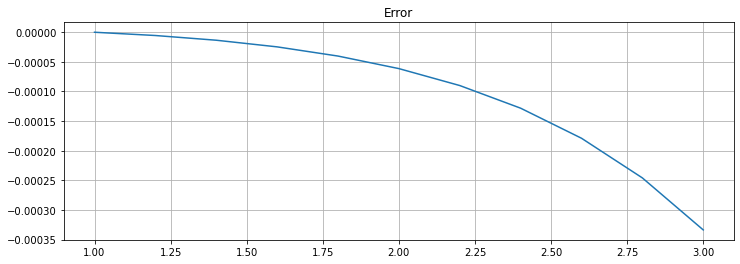

In [40]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
  
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = RungeKutta(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=} — by the Runge-Kutta Method with {n} steps")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

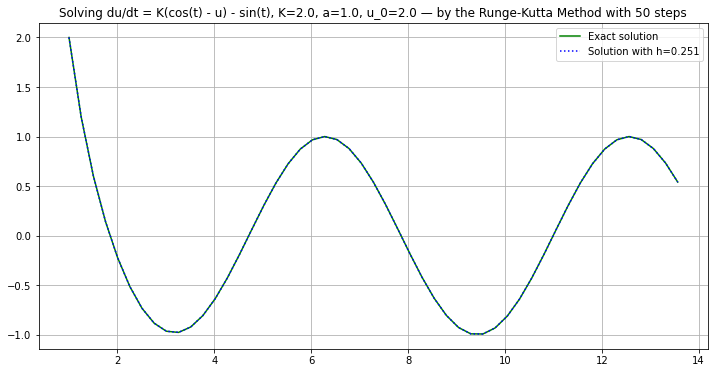

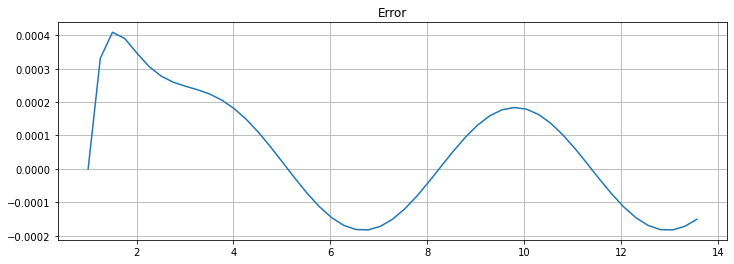

In [41]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = RungeKutta(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} — by the Runge-Kutta Method with {n} steps")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

In [42]:
def RungeKutta_system(f, a, b, u_0, n=100):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following three lines change for the systems version — the same lines as for euler_system and so on.
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, U[i]+K_2/2)*h
        K_4 = f(t[i]+h, U[i]+K_3)*h
        U[i+1] = U[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, U)

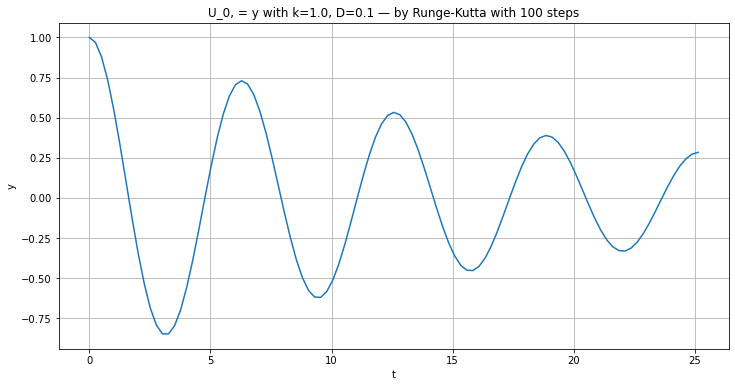

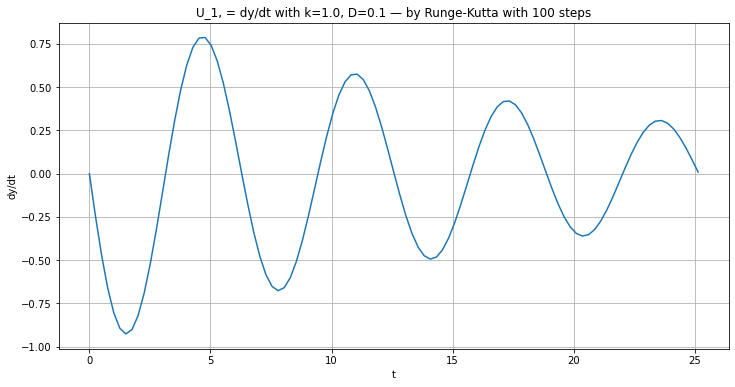

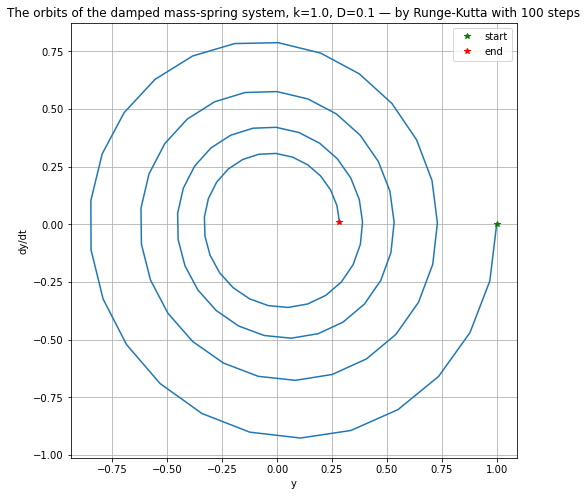

In [43]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.

    def f_mass_spring(t, u):
        return np.array([ u[1], -(k/M)*u[0] - (D/M)*u[1]])
    M = 1.0
    k = 1.0
    D = 0.1
    u_0 = [1.0, 0.0]
    a = 0.0
    b = 8 * np.pi # Four periods
    n = 100  # Should be enough now!

    (t, U) = RungeKutta_system(f_mass_spring, a, b, u_0, n)
    y = U[:,0]
    Dy = U[:,1]

    plt.figure(figsize=[12,6])
    plt.title(f"U_0, = y with {k=}, {D=} — by Runge-Kutta with {n} steps")
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)

    plt.figure(figsize=[12,6])
    plt.title(f"U_1, = dy/dt with {k=}, {D=} — by Runge-Kutta with {n} steps")
    plt.plot(t, Dy)
    plt.xlabel('t')
    plt.ylabel('dy/dt')
    plt.grid(True)

    plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
    if D == 0.:
        plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Runge-Kutta with {n} steps")
    else:
        plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Runge-Kutta with {n} steps")
    plt.plot(y, Dy)
    plt.xlabel('y')
    plt.ylabel('dy/dt')
    plt.plot(y[0], Dy[0], "g*", label="start")
    plt.plot(y[-1], Dy[-1], "r*", label="end")
    plt.legend()
    plt.grid(True)

### For the future: an attempt to use the IMPLICIT Midpoint Method

Solving for now with a few fixed point iterations.

In [44]:
def FP_Midpoint_system(f, a, b, u_0, n=100, iterations=1):
    """Use a few iterations of a fixed point method solution of the Implicit Midpoint Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0
    Note:
        - the default of iterations=1 gives the Explicit Midpoint Method
        - iterations=0 gives Euler's Method
        """
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following three lines change for the systems version — the same lines as for euler_system and so on.
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        K = f(t[i], U[i])*h
        # A few iterations of the fixed point method
        for iteration in range(iterations):
            K = f(t[i]+h/2, U[i]+K/2)*h
        U[i+1] = U[i] + K
    return (t, U)

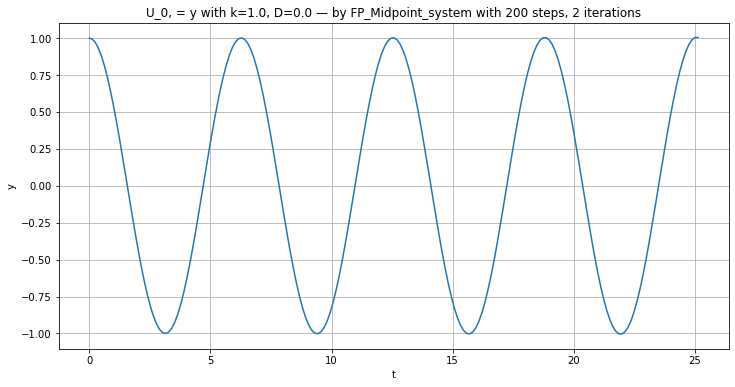

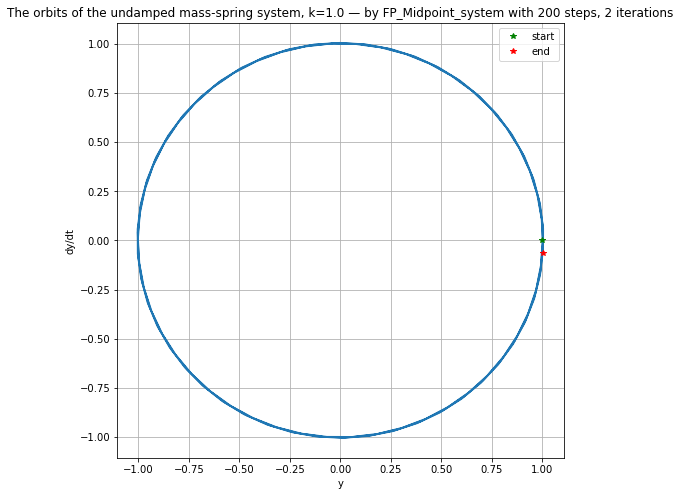

In [56]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.

    def f_mass_spring(t, u):
        return np.array([ u[1], -(k/M)*u[0] - (D/M)*u[1]])
    M = 1.0
    k = 1.0
    D = 0.0
    u_0 = [1.0, 0.0]
    a = 0.0
    b = 8 * np.pi # Four periods
    n = 200
    iterations = 2

    (t, U) = FP_Midpoint_system(f_mass_spring, a, b, u_0, n, iterations=1)
    y = U[:,0]
    Dy = U[:,1]

    plt.figure(figsize=[12,6])
    plt.title(f"U_0, = y with {k=}, {D=} — by FP_Midpoint_system with {n} steps, {iterations} iterations")
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)

    plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
    if D == 0.:
        plt.title(f"The orbits of the undamped mass-spring system, {k=} — by FP_Midpoint_system with {n} steps, {iterations} iterations")
    else:
        plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by FP_Midpoint_system with {n} steps, {iterations} iterations")
    plt.plot(y, Dy)
    plt.xlabel('y')
    plt.ylabel('dy/dt')
    plt.plot(y[0], Dy[0], "g*", label="start")
    plt.plot(y[-1], Dy[-1], "r*", label="end")
    plt.legend()
    plt.grid(True)

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)